In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
emission = pd.read_csv('/content/CO2_emission.csv')
print(emission.columns)

Index(['Country Name', 'country_code', 'Region', 'Indicator Name', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2019.1'],
      dtype='object')


In [ ]:
emission.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217


In [ ]:
print("emission data set dimensions : {}".format(emission.shape))

emission data set dimensions : (215, 35)


In [ ]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    215 non-null    object 
 1   country_code    215 non-null    object 
 2   Region          215 non-null    object 
 3   Indicator Name  215 non-null    object 
 4   1990            185 non-null    float64
 5   1991            186 non-null    float64
 6   1992            189 non-null    float64
 7   1993            189 non-null    float64
 8   1994            189 non-null    float64
 9   1995            190 non-null    float64
 10  1996            190 non-null    float64
 11  1997            190 non-null    float64
 12  1998            189 non-null    float64
 13  1999            189 non-null    float64
 14  2000            190 non-null    float64
 15  2001            190 non-null    float64
 16  2002            191 non-null    float64
 17  2003            191 non-null    flo

In [ ]:
emission.drop(['country_code','Indicator Name','2019.1'],axis=1,inplace=True)

In [ ]:
col_year = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003',
            '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017',
            '2018','2019']
df1 = pd.melt(emission,id_vars=['Country Name'],value_vars=col_year,var_name='Year',value_name='CO2 Value')
df1.head()

,Country Name,Year,CO2 Value
0,Aruba,1990,NaN
1,Afghanistan,1990,0.191745
2,Angola,1990,0.553662
3,Albania,1990,1.819542
4,Andorra,1990,7.521832


<Axes: xlabel='Year', ylabel='CO2 Value'>

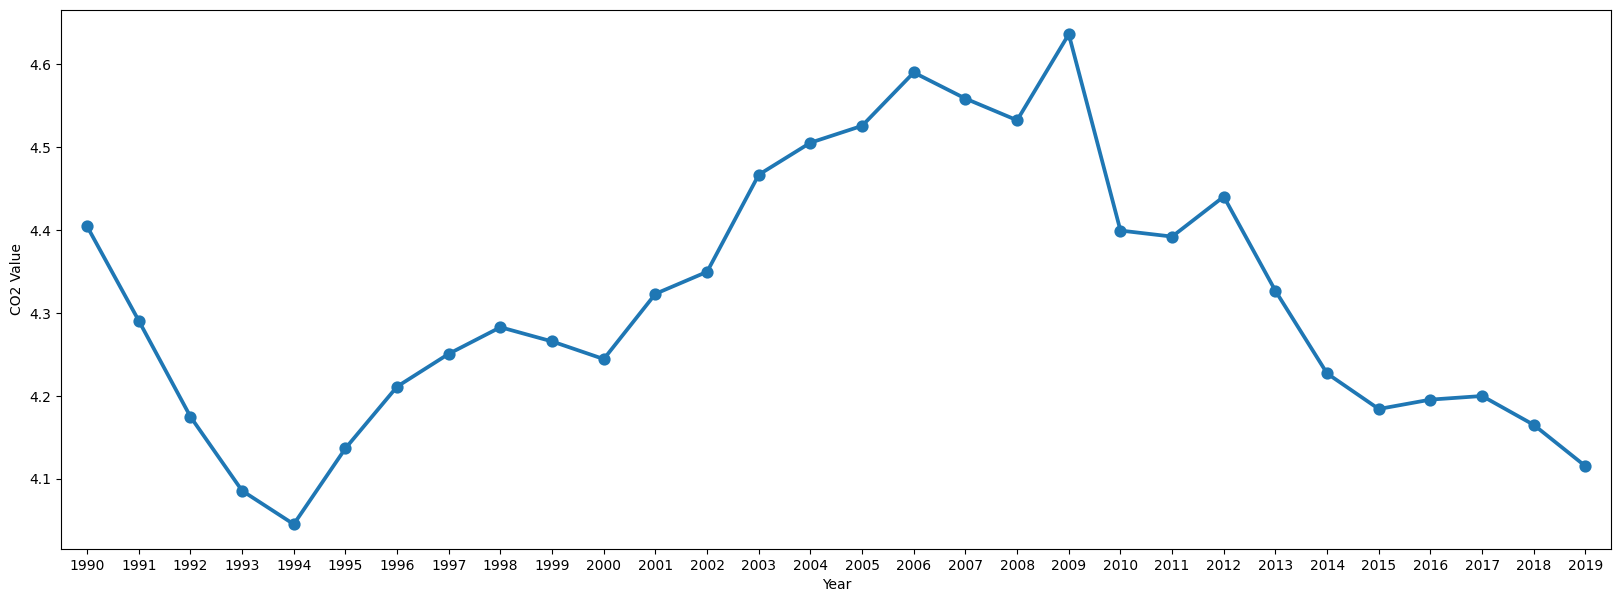

In [ ]:
year = df1.groupby('Year')['CO2 Value'].mean().reset_index()
plt.figure(figsize=(20,7))
sns.pointplot(data=year,x='Year',y='CO2 Value')

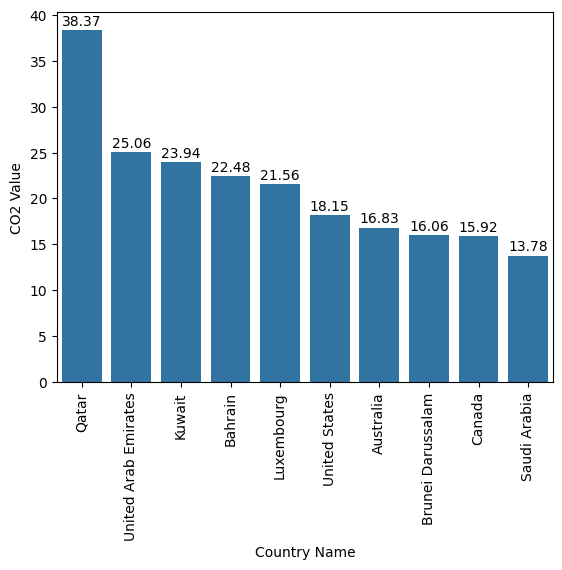

In [ ]:
country = round(df1.groupby('Country Name')['CO2 Value'].mean().reset_index().sort_values('CO2 Value',ascending=False),2)
country = country.head(10).reset_index(drop=True)
g = sns.barplot(data=country,x='Country Name',y='CO2 Value')
for v in country.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+0.5,s=str(v._2), size=10, ha="center")
plt.xticks(rotation=90)
plt.show()

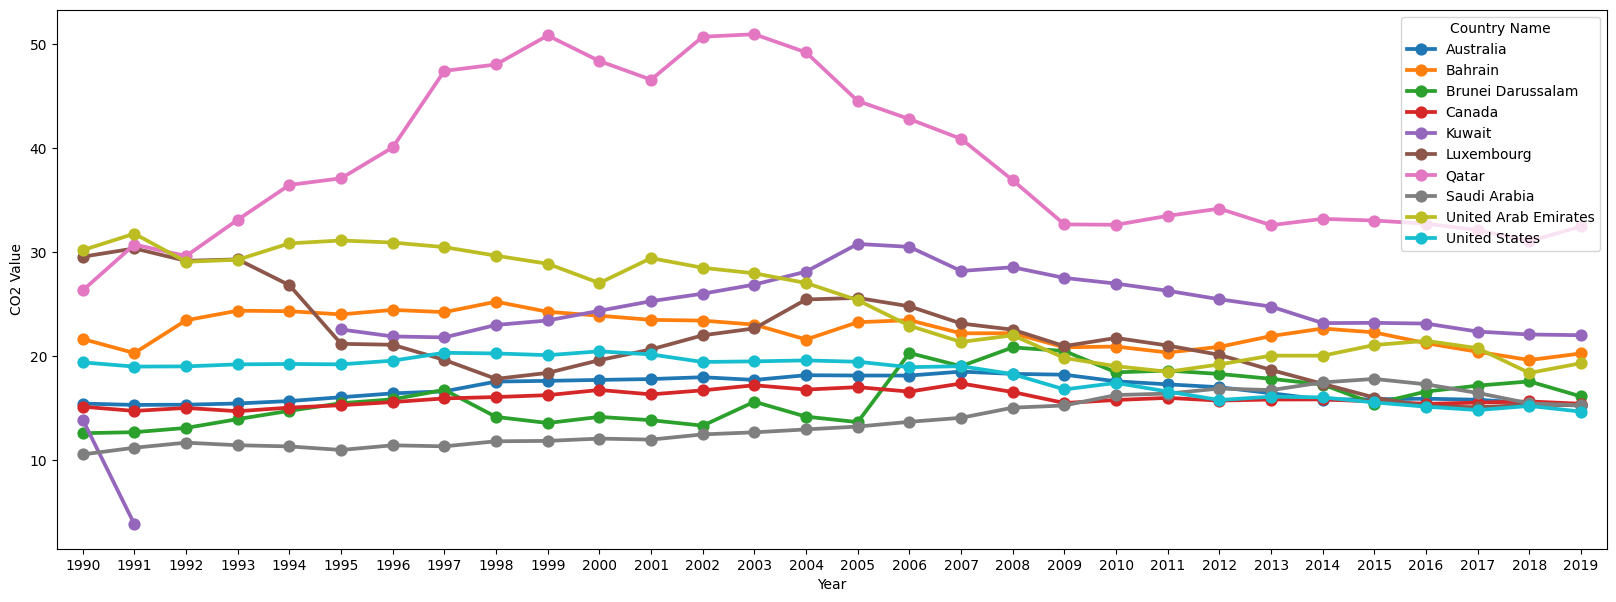

In [ ]:
year_country = df1.groupby(['Year','Country Name'])['CO2 Value'].mean().reset_index()
year_country = year_country[year_country['Country Name'].isin(country['Country Name'])]
plt.figure(figsize=(20,7))
sns.pointplot(data=year_country,x='Year',y='CO2 Value',hue='Country Name')
plt.show()

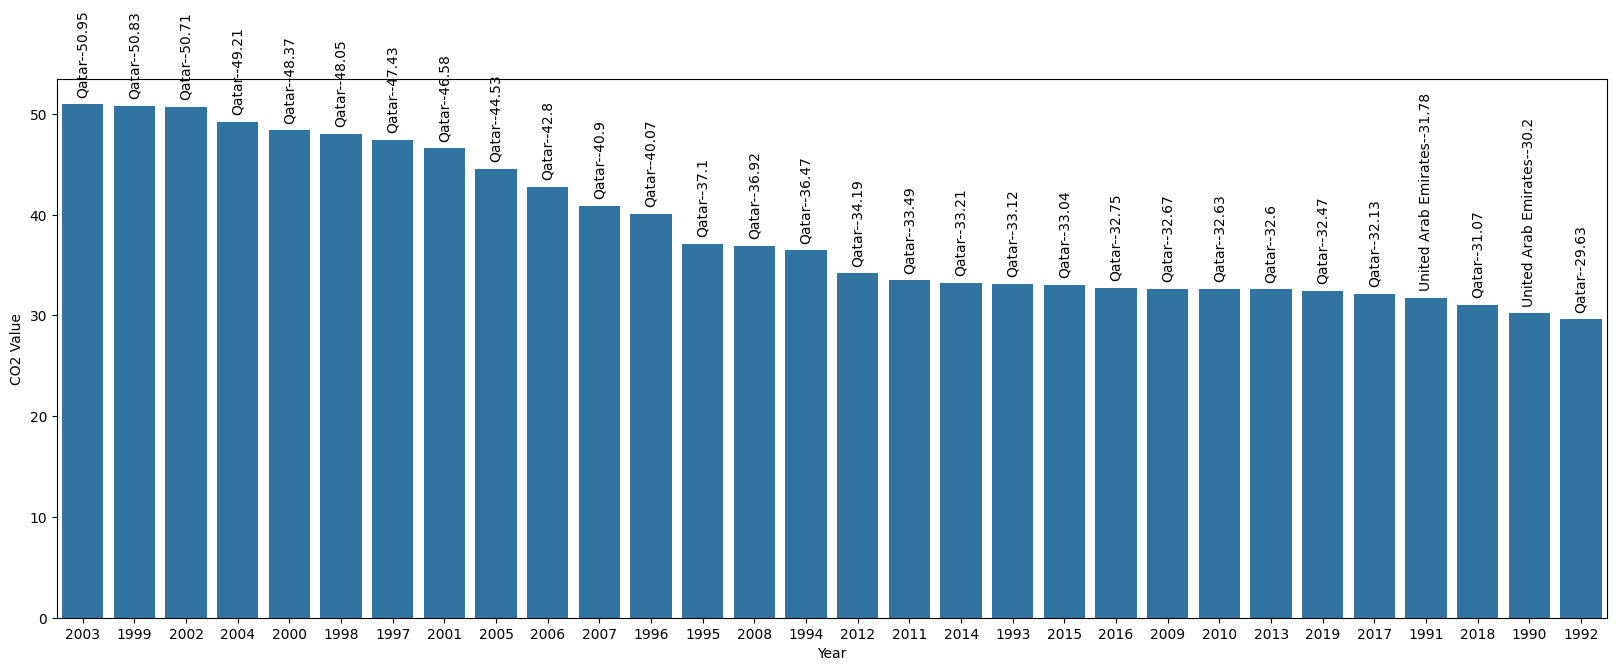

In [ ]:
year_country_co2 = round(df1.groupby(['Year','Country Name'])['CO2 Value'].mean().reset_index().sort_values('CO2 Value',ascending=False).groupby('Year').head(1).reset_index(drop=True),2)
plt.figure(figsize=(20,7))
g = sns.barplot(data=year_country_co2,x='Year',y='CO2 Value')
country = year_country_co2['Country Name']
for v in year_country_co2.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._3+1,s=str(v._2 + '--' +str(round(v._3, 2))), size=10, rotation=90, ha="center")
plt.show()

In [ ]:
emission.drop(labels=['Country Name','Region'],axis=1,inplace=True)

In [ ]:
emission.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')

In [ ]:
emission.dropna(inplace = True)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss_list = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(emission)
  wcss_list.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
emission.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,0.040157,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
2,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,1.109860,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
3,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,0.466921,0.572154,0.955359,...,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248
4,7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,7.923192,...,6.157198,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217
5,30.195189,31.778496,29.080926,29.275678,30.849333,31.125018,30.928026,30.486333,29.663581,28.887108,...,19.039770,18.509457,19.207801,20.055648,20.051698,21.077642,21.480669,20.769022,18.390678,19.329563


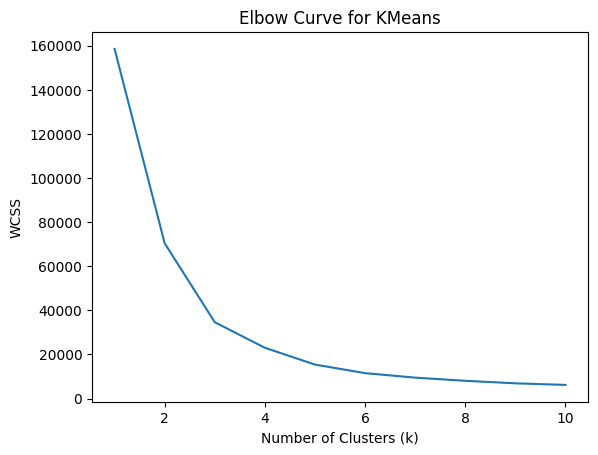

In [ ]:
plt.plot(range(1, 11), wcss_list)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Curve for KMeans")
plt.show()

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(emission)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
ytest = kmeans.predict(emission)
ytest

array([0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [ ]:
cluster_labels = kmeans.labels_

# Calculate Silhouette score
silhouette_coeff = silhouette_score(emission, cluster_labels)

# Print the Silhouette score
print("Silhouette Score:", silhouette_coeff)

Silhouette Score: 0.6126956301758558


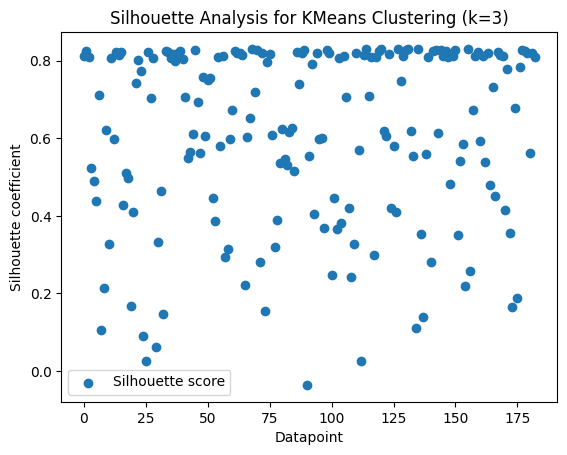

In [ ]:
silhouette_values = silhouette_samples(emission, cluster_labels)

# Visualize silhouette scores
plt.scatter(range(len(emission)), silhouette_values, label='Silhouette score')
plt.legend()
plt.ylabel('Silhouette coefficient')
plt.xlabel('Datapoint')
plt.title("Silhouette Analysis for KMeans Clustering (k=" + str(k) + ")")
plt.show()